In [7]:
import numpy as np
import pandas as pd

# Read data
data = pd.read_csv('/home/test/workspace/research_project_ws23/matlab_to_jupyter/xy.csv')
GT = {
    'x': data['GT_x'].values,
    'y': data['GT_y'].values,
    'alpha': data['GT_alpha'].values,
    'Kr': data['GT_Kr'].values,
    'v': data['GT_v'].values
}
t = data['time'].values
Ts = t[1] - t[0]
aa = data['GT_alpha'].values + np.sqrt(1e-2) * np.random.randn(len(t))
y = data[['Pos_x', 'Pos_y']].T.values

# VORABBESTIMMUNG VON K0 und H
R0 = 1
Q0 = 11
lambda_ = Ts * np.sqrt(Q0 / R0)
K1 = -1/8 * (lambda_**2 + 8 * lambda_ - (lambda_ + 4) * np.sqrt(lambda_**2 + 8 * lambda_))
K2 = 0.25 * (lambda_**2 + 4 * lambda_ - lambda_ * np.sqrt(lambda_**2 + 8 * lambda_)) / Ts
K0 = np.array([K1, K2])
H = np.array([[1 - K1, Ts - K1 * Ts], [-K2, 1 - K2 * Ts]])

# Initialization
Gamma = 0.9
Alpha_R = 0.08
R = Gamma * np.cov(y[:, :100])
qxy = 2E-5
qa = 4E-4
qKr = 3E-4
qv = 5E-3
GQG = np.diag([qxy, qxy, qa, qKr, qv])
Cj = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0]])
x_dach = np.array([y[0, 0], y[1, 0], 0, 0, 0])
P_dach = np.diag([0.1, 0.1, 1e-2, 1e-3, 1e-2])

xP, yP, alpha, Kr, v = [], [], [], [], []

# Kalman Filter Loop
for k in range(len(y[0])):
    dy = y[:, k] - Cj.dot(x_dach)
    M = Cj.dot(P_dach).dot(Cj.T) + R
    invM = np.linalg.inv(M)
    K = P_dach.dot(Cj.T).dot(invM)
    x_tilde = x_dach + K.dot(dy)
    P_tilde = (np.eye(len(x_dach)) - K.dot(Cj)).dot(P_dach).dot(np.eye(len(x_dach)) - K.dot(Cj).T) + K.dot(R).dot(K.T)

    xP.append(x_tilde[0])
    yP.append(x_tilde[1])
    alpha.append(x_tilde[2])
    Kr.append(x_tilde[3])
    v.append(x_tilde[4])

    x_dach = [
        xP[k] - v[k] * Ts * np.sin(alpha[k]),
        yP[k] + v[k] * Ts * np.cos(alpha[k]),
        alpha[k] + v[k] * Ts * Kr[k],
        Kr[k],
        v[k]
    ]

    Aj = np.array([
        [1, 0, -v[k] * Ts * np.cos(alpha[k]), 0, -Ts * np.sin(alpha[k])],
        [0, 1, -v[k] * Ts * np.sin(alpha[k]), 0, Ts * np.cos(alpha[k])],
        [0, 0, 1, v[k] * Ts, Kr[k] * Ts],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]
    ])

    P_dach = Aj.dot(P_tilde + GQG).dot(Aj.T)

# Convert lists to arrays for further processing
xP = np.array(xP)
yP = np.array(yP)
alpha = np.array(alpha)
Kr = np.array(Kr)
v = np.array(v)



rms_xy EKF: 0.23318819787070358
rms_alpha EKF: 0.26802640066388805
rms_Kr EKF: 0.15181893480240893
rms_v EKF: 0.39333407452709945


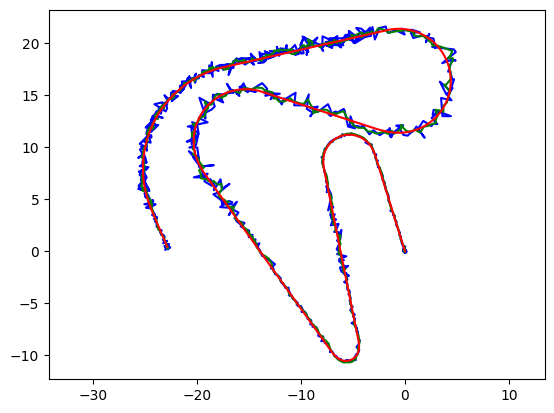

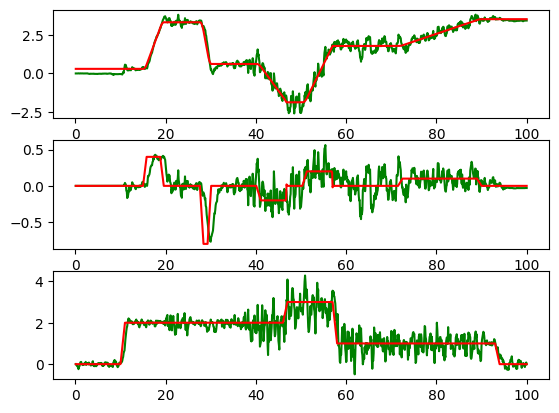

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
plt.figure(1)
plt.clf()
plt.plot(y[0, :], y[1, :], 'b-', xP, yP, 'g-', GT['x'], GT['y'], 'r-')
plt.axis('equal')

plt.figure(2)
plt.clf()
plt.subplot(311)
plt.plot(t, alpha, 'g-', t, GT['alpha'], 'r')
plt.subplot(312)
plt.plot(t, Kr, 'g-', t, GT['Kr'], 'r')
plt.subplot(313)
plt.plot(t, v, 'g-', t, GT['v'], 'r')

# Root Mean Square Error Calculations
def rms(values):
    return np.sqrt(np.mean(np.square(values)))

rms_EKF_xy = rms(np.sqrt((xP - GT['x'])**2 + (yP - GT['y'])**2))
rms_EKF_a = rms(alpha - GT['alpha'])
rms_EKF_Kr = rms(Kr - GT['Kr'])
rms_EKF_v = rms(v - GT['v'])

print(f'rms_xy EKF: {rms_EKF_xy}')
print(f'rms_alpha EKF: {rms_EKF_a}')
print(f'rms_Kr EKF: {rms_EKF_Kr}')
print(f'rms_v EKF: {rms_EKF_v}')

# Data for output file
output_data = pd.DataFrame({
    'time': t,
    'Pos_x': data['Pos_x'],
    'Pos_y': data['Pos_y'],
    'GT_x': GT['x'],
    'GT_y': GT['y'],
    'GT_alpha': GT['alpha'],
    'GT_Kr': GT['Kr'],
    'GT_v': GT['v'],
    'EKF_x': xP,
    'EKF_y': yP,
    'EKF_alpha': alpha,
    'EKF_Kr': Kr,
    'EKF_v': v
})

# Write data to file
output_data.to_csv('/home/test/workspace/research_project_ws23/matlab_to_jupyter/EKF_Rose_data.csv', sep=',', index=False)

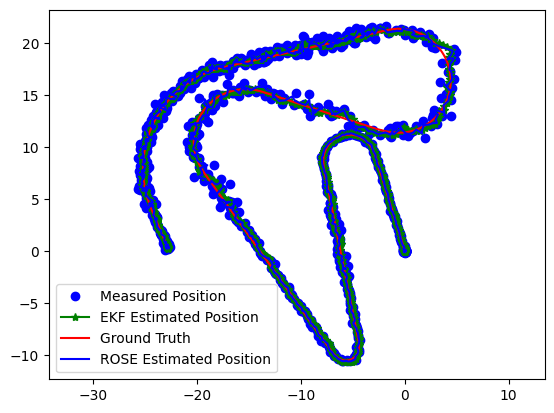

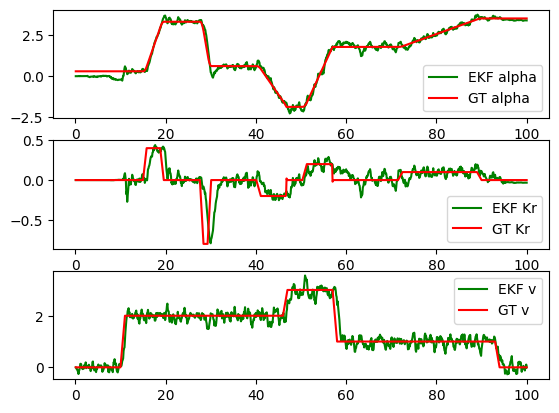

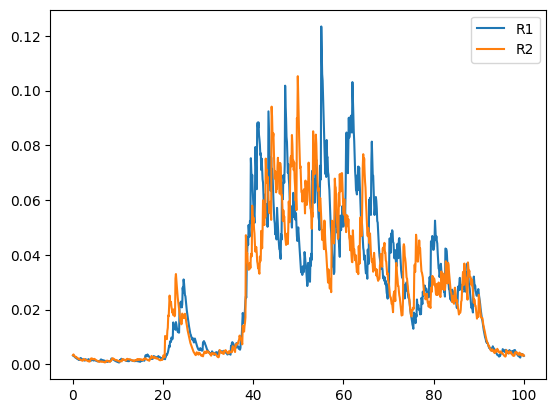

NameError: name 'ROSE_x' is not defined

In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

# Load data
data = pd.read_csv('/home/test/workspace/research_project_ws23/matlab_to_jupyter/xy.csv')

# Ground Truth (GT) data
GT = {
    'x': data['GT_x'].values,
    'y': data['GT_y'].values,
    'alpha': data['GT_alpha'].values,
    'Kr': data['GT_Kr'].values,
    'v': data['GT_v'].values
}

t = data['time'].values
Ts = t[1] - t[0]
aa = data['GT_alpha'] + np.sqrt(1e-2) * np.random.randn(len(t))
y = np.vstack((data['Pos_x'].values, data['Pos_y'].values))

# Pre-determination of K0 and H
R0 = 1
Q0 = 11
lambda_ = Ts * np.sqrt(Q0 / R0)
K1 = -1/8 * (lambda_**2 + 8*lambda_ - (lambda_ + 4) * np.sqrt(lambda_**2 + 8*lambda_))
K2 = 0.25 * (lambda_**2 + 4*lambda_ - lambda_ * np.sqrt(lambda_**2 + 8*lambda_)) / Ts
K0 = np.array([K1, K2])
H = np.array([[1 - K1, Ts - K1 * Ts], [-K2, 1 - K2 * Ts]])

# Initialize ROSE-filter
Gamma = 0.9
Alpha_R = 0.08
R = Gamma * np.cov(y[:, :100])

# Noise covariance matrices
qxy = 2E-5
qa = 4E-4
qKr = 3E-4
qv = 5E-3
GQG = np.diag([qxy, qxy, qa, qKr, qv])

Cj = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0]])

x_dach = np.array([y[0, 0], y[1, 0], 0, 0, 0])
P_dach = np.diag([.1, .1, 1e-2, 1e-3, 1e-2])
x1 = np.array([y[0, 0], 0])
x2 = np.array([y[1, 0], 0])

xR, yR, r1, r2, xP, yP, alpha, Kr, v = ([] for i in range(9))

for k in range(len(y.T)):
    x1 = H @ x1 + K0 * y[0, k]
    xR.append(x1[0])
    x2 = H @ x2 + K0 * y[1, k]
    yR.append(x2[0])

    R = Gamma * Alpha_R * np.outer(y[:, k] - np.array([x1[0], x2[0]]), y[:, k] - np.array([x1[0], x2[0]])) + (1 - Alpha_R) * R
    r1.append(R[0, 0])
    r2.append(R[1, 1])

    dy = y[:, k] - Cj @ x_dach
    M = Cj @ P_dach @ Cj.T + R
    invM = inv(M)
    K = P_dach @ Cj.T @ invM
    x_tilde = x_dach + K @ dy
    P_tilde = (np.eye(len(x_dach)) - K @ Cj) @ P_dach @ (np.eye(len(x_dach)) - K @ Cj).T + K @ R @ K.T

    xP.append(x_tilde[0])
    yP.append(x_tilde[1])
    alpha.append(x_tilde[2])
    Kr.append(x_tilde[3])
    v.append(x_tilde[4])

    x_dach = [
        xP[k] - v[k] * Ts * np.sin(alpha[k]),
        yP[k] + v[k] * Ts * np.cos(alpha[k]),
        alpha[k] + v[k] * Ts * Kr[k],
        Kr[k],
        v[k]
    ]

    Aj = np.array([
        [1, 0, -v[k] * Ts * np.cos(alpha[k]), 0, -Ts * np.sin(alpha[k])],
        [0, 1, -v[k] * Ts * np.sin(alpha[k]), 0, Ts * np.cos(alpha[k])],
        [0, 0, 1, v[k] * Ts, Kr[k] * Ts],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]
    ])

    P_dach = Aj @ (P_tilde + GQG) @ Aj.T

# Convert lists to numpy arrays
xR, yR, r1, r2, xP, yP, alpha, Kr, v = map(np.array, [xR, yR, r1, r2, xP, yP, alpha, Kr, v])

import matplotlib.pyplot as plt

# Converting lists to arrays for easy computation
xR = np.array(xR)
yR = np.array(yR)
xP = np.array(xP)
yP = np.array(yP)
alpha = np.array(alpha)
Kr = np.array(Kr)
v = np.array(v)

# Plotting
plt.figure(1)
plt.clf()
plt.plot(y[0, :], y[1, :], 'bo', label='Measured Position')
plt.plot(xP, yP, 'g-*', label='EKF Estimated Position')
plt.plot(GT['x'], GT['y'], 'r', label='Ground Truth')
plt.plot(xR, yR, 'b', label='ROSE Estimated Position')
plt.axis('equal')
plt.legend()
plt.show()

plt.figure(2)
plt.clf()
plt.subplot(311)
plt.plot(t, alpha, 'g-', label='EKF alpha')
plt.plot(t, GT['alpha'], 'r', label='GT alpha')
plt.legend()

plt.subplot(312)
plt.plot(t, Kr, 'g-', label='EKF Kr')
plt.plot(t, GT['Kr'], 'r', label='GT Kr')
plt.legend()

plt.subplot(313)
plt.plot(t, v, 'g-', label='EKF v')
plt.plot(t, GT['v'], 'r', label='GT v')
plt.legend()
plt.show()

plt.figure(3)
plt.clf()
plt.plot(t, r1, label='R1')
plt.plot(t, r2, label='R2')
plt.legend()
plt.show()

# Calculating RMS values
rms_KF_xy = np.sqrt(np.mean((xR - GT['x'])**2 + (yR - GT['y'])**2))
rms_EKF_xy = np.sqrt(np.mean((xP - GT['x'])**2 + (yP - GT['y'])**2))
rms_ROSE_xy = np.sqrt(np.mean((ROSE_x - GT['x'])**2 + (ROSE_y - GT['y'])**2))

print(f'rms_xy KF: {rms_KF_xy}, EKF: {rms_EKF_xy}, ROSE: {rms_ROSE_xy}')

rms_EKF_a = np.sqrt(np.mean((alpha - GT['alpha'])**2))
rms_ROSE_a = np.sqrt(np.mean((ROSE_alpha - GT['alpha'])**2))

print(f'rms_alpha EKF: {rms_EKF_a}, ROSE: {rms_ROSE_a}')

rms_EKF_Kr = np.sqrt(np.mean((Kr - GT['Kr'])**2))
rms_ROSE_Kr = np.sqrt(np.mean((ROSE_Kr - GT['Kr'])**2))

print(f'rms_Kr EKF: {rms_EKF_Kr}, ROSE: {rms_ROSE_Kr}')

rms_EKF_v = np.sqrt(np.mean((v - GT['v'])**2))
rms_ROSE_v = np.sqrt(np.mean((ROSE_v - GT['v'])**2))

print(f'rms_v EKF: {rms_EKF_v}, ROSE: {rms_ROSE_v}')

# Improvement calculation
improvement = np.array([rms_EKF_xy/rms_ROSE_xy, rms_EKF_a/rms_ROSE_a, 
                        rms_EKF_Kr/rms_ROSE_Kr, rms_EKF_v/rms_ROSE_v])
print(f'Improvement EKF/ROSE: xy: {improvement[0]}, alpha: {improvement[1]}, '
      f'Kr: {improvement[2]}, v: {improvement[3]}, Mean: {np.mean(improvement)}')


# Save results to a file
results = pd.DataFrame({
    'time': t,
    'Pos_x': data['Pos_x'],
    'Pos_y': data['Pos_y'],
    # ... (Include other data columns as needed)
})
results.to_csv('EKF_ROSE.dat', sep=' ', index=False)
